In [8]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import json

In [9]:
total_df=pd.DataFrame()

In [10]:
data_name_own='son_own_slience_2'


path_own='D:/parentsvoice_1.13.1/resources/datasets/'+data_name_own


file_list_own=os.listdir(path_own+'/meta_static')

data_list_own=[]

for i in file_list_own:
    with open(os.path.join(path_own,'meta_static',i),encoding='utf-8') as f:
        json_data=json.load(f)
        total_df=total_df.append(json_data,ignore_index=True)


KeyboardInterrupt: 

In [ ]:
total_df.to_csv("son_own_total.csv",encoding='utf-8-sig')

In [ ]:
        # train에 사용되는 데이터만 가져옴
        '''
        if json_data['데이터 가용']:
            data_list_own.append(
                Data(
                    json_data['파일명'],json_data['문장'],json_data['데이터 가용'],
                    json_data['상세 문장'],json_data['토큰 총 갯수'],json_data['토큰 별 갯수'],
                    json_data['초성'],json_data['중성'],json_data['종성'],json_data['특수문자']
                ))

In [46]:
# 종합 

import re
 
def cleanText(readData):
 
    #텍스트에 포함되어 있는 특수 문자 제거
 
    text = re.sub('[-=+,#/\?:^$.@*\"※~&%ㆍ!』\\‘|\(\)\[\]\<\>`\'…》]', '', readData)
 
    return text.strip()



loser='D:/parentsvoice_1.13.1/resources/datasets/son_total/data_split_최종.log'

lists=[]

with open(loser, 'r') as log:
    while True:
        line =log.readline().strip('\n')
        if not line : break
        lists.append(line)

path=[]
audio_size=[]
count_token=[]

for i in lists:
    nodes=i.split(',')
    path.append(cleanText(nodes[0]))
    audio_size.append(int(cleanText(nodes[1])))
    count_token.append(int(cleanText(nodes[2])))

data=pd.DataFrame(zip(path,audio_size,count_token))

'''
min_n_frame = hparams.reduction_factor * hparams.min_iters 
max_n_frame = hparams.reduction_factor * hparams.max_iters - hparams.reduction_factor
'''

min_n_frame = 5 * 30
max_n_frame = 5 * 200 - 5


In [47]:
len(data)

3971

In [48]:
data[data[1]==11248]

,0,1,2
3431,datasetsson_own_slience_2audioNB11754388 20wav,11248,107


In [50]:
max(data[1])

2333

In [49]:
# black list // 만단위..
data=data.drop(3431)

(array([3.237e+03, 5.260e+02, 1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00]),
 array([   33. ,  1154.5,  2276. ,  3397.5,  4519. ,  5640.5,  6762. ,
         7883.5,  9005. , 10126.5, 11248. ]),
 <a list of 10 Patch objects>)

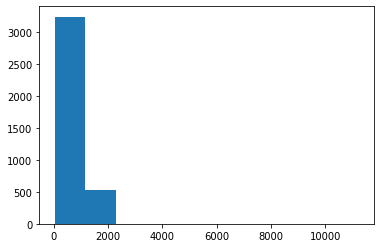

In [30]:
plt.hist(list(data[1]))

In [23]:

max(data[1])

11248


- case 1 <br> 
tokens<30 <br>
audio<min_n_frame

In [16]:
# tokens도 작고 audio shape도 작은 경우
goal=data[(data[2]<30) & (data[1] < min_n_frame)]
print('갯수 {}, 비율 {}'.format(len(goal),(len(goal)/len(data))*100))


갯수 1195, 비율 31.739707835325365


In [17]:
goal

,0,1,2
1,datasetsson_own_slienceaudioNB10584578wav 6wav,112,28
4,datasetsson_own_slienceaudioNB10587175wav 19wav,86,29
11,datasetsson_own_slienceaudioNB10593181wav 1...,50,14
12,datasetsson_own_slienceaudioNB10593181wav 2wav,115,23
16,datasetsson_own_slienceaudioNB10594493wav 2...,84,26
...,...,...,...
3735,datasetsson_own_slienceaudioNB11921681 6wav,125,16
3752,datasetsson_own_slienceaudioNB11925011 21wav,126,28
3754,datasetsson_own_slienceaudioNB11925011 4wav,127,29
3756,datasetsson_own_slienceaudioNB11925852 17wav,109,25


- case 2 <br>
token<30 <br>
audio>min_n_frame


In [18]:

# 토큰 수는 작은데 오디오 길이가 긴 경우 (쓸데 없음)
goal=data[(data[2]<30) & (data[1] > min_n_frame)]
print('갯수 {}, 비율 {}'.format(len(goal),(len(goal)/len(data))*100))


갯수 318, 비율 8.44621513944223


In [19]:
goal[0]

21      datasetsson_own_slienceaudioNB10594493wav    3wav
44      datasetsson_own_slienceaudioNB10601681waw     ...
47      datasetsson_own_slienceaudioNB10604725wav    1...
49      datasetsson_own_slienceaudioNB10607174wav    9wav
60           datasetsson_own_slienceaudioNB10618854 13wav
                              ...                        
3660         datasetsson_own_slienceaudioNB11900879 10wav
3662         datasetsson_own_slienceaudioNB11900879 20wav
3677          datasetsson_own_slienceaudioNB11906584 2wav
3688          datasetsson_own_slienceaudioNB11910146 2wav
3720          datasetsson_own_slienceaudioNB11917523 2wav
Name: 0, Length: 318, dtype: object


- case 3 <br>
tokens >125 <br>
audio <min_n_frame <br>
토큰수는 많은데 오디오가 shape이 작다..? // 확인

In [20]:
goal=data[(data[2]>125) & (data[1] < min_n_frame)]
print('갯수 {}, 비율 {}'.format(len(goal),(len(goal)/len(data))*100))

갯수 3, 비율 0.0796812749003984


In [21]:

goal


,0,1,2
1169,datasetsson_own_slienceaudioNB11275345 12wav,63,127
3179,datasetsson_own_slienceaudioNB11743838 8wav,128,134
3366,datasetsson_own_slienceaudioNB11798522 8wav,133,187


In [ ]:
11275345 - lee
NB11743838 -ryu